##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [5]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1 = -0.12;
k2 = 0.39
el_link = 0.0

condition2 = SA[-0.1, -0.1, -0.1, -0.2, -0.1, -0.1]

p = [a, b, c, d, s, xr, r, I, xv, k1, k2,  el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition2, p )

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.2, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.12, 0.39, 0.0]

In [28]:
ds = ds_HR1

pvalues = range(-0.14, stop = 0.0, length = 2000)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

10

In [29]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = Vern9(), abstol = 1e-14, reltol = 1e-14, maxiters = 50000000)
                                );

parameter = -0.14
parameter = -0.13992996498249125
parameter = -0.1398599299649825
parameter = -0.13978989494747374
parameter = -0.139719859929965
parameter = -0.13964982491245623
parameter = -0.1395797898949475
parameter = -0.13950975487743872
parameter = -0.13943971985992998
parameter = -0.1393696848424212
parameter = -0.13929964982491247
parameter = -0.1392296148074037
parameter = -0.13915957978989496
parameter = -0.1390895447723862
parameter = -0.13901950975487745
parameter = -0.13894947473736868
parameter = -0.13887943971985994
parameter = -0.13880940470235117
parameter = -0.13873936968484243
parameter = -0.13866933466733367
parameter = -0.13859929964982493
parameter = -0.13852926463231616
parameter = -0.13845922961480742
parameter = -0.13838919459729865
parameter = -0.1383191595797899
parameter = -0.13824912456228114
parameter = -0.1381790895447724
parameter = -0.13810905452726363
parameter = -0.1380390195097549
parameter = -0.13796898449224612
parameter = -0.13789894947473738
pa

parameter = -0.12249124562281141
parameter = -0.12242121060530266
parameter = -0.1223511755877939
parameter = -0.12228114057028515
parameter = -0.1222111055527764
parameter = -0.12214107053526764
parameter = -0.12207103551775889
parameter = -0.12200100050025013
parameter = -0.12193096548274138
parameter = -0.12186093046523262
parameter = -0.12179089544772387
parameter = -0.12172086043021511
parameter = -0.12165082541270636
parameter = -0.1215807903951976
parameter = -0.12151075537768885
parameter = -0.1214407203601801
parameter = -0.12137068534267134
parameter = -0.12130065032516259
parameter = -0.12123061530765383
parameter = -0.12116058029014508
parameter = -0.12109054527263632
parameter = -0.12102051025512757
parameter = -0.12095047523761882
parameter = -0.12088044022011006
parameter = -0.1208104052026013
parameter = -0.12074037018509255
parameter = -0.1206703351675838
parameter = -0.12060030015007504
parameter = -0.12053026513256629
parameter = -0.12046023011505753
parameter = -0.1

parameter = -0.10491245622811406
parameter = -0.1048424212106053
parameter = -0.10477238619309655
parameter = -0.1047023511755878
parameter = -0.10463231615807904
parameter = -0.10456228114057028
parameter = -0.10449224612306153
parameter = -0.10442221110555278
parameter = -0.10435217608804402
parameter = -0.10428214107053527
parameter = -0.10421210605302651
parameter = -0.10414207103551776
parameter = -0.104072036018009
parameter = -0.10400200100050025
parameter = -0.1039319659829915
parameter = -0.10386193096548274
parameter = -0.10379189594797399
parameter = -0.10372186093046523
parameter = -0.10365182591295648
parameter = -0.10358179089544772
parameter = -0.10351175587793897
parameter = -0.10344172086043021
parameter = -0.10337168584292146
parameter = -0.1033016508254127
parameter = -0.10323161580790395
parameter = -0.1031615807903952
parameter = -0.10309154577288644
parameter = -0.10302151075537769
parameter = -0.10295147573786893
parameter = -0.10288144072036018
parameter = -0.10

parameter = -0.08733366683341671
parameter = -0.08726363181590796
parameter = -0.0871935967983992
parameter = -0.08712356178089045
parameter = -0.0870535267633817
parameter = -0.08698349174587294
parameter = -0.08691345672836419
parameter = -0.08684342171085543
parameter = -0.08677338669334668
parameter = -0.08670335167583793
parameter = -0.08663331665832917
parameter = -0.08656328164082042
parameter = -0.08649324662331166
parameter = -0.08642321160580291
parameter = -0.08635317658829415
parameter = -0.0862831415707854
parameter = -0.08621310655327664
parameter = -0.08614307153576789
parameter = -0.08607303651825914
parameter = -0.08600300150075038
parameter = -0.08593296648324163
parameter = -0.08586293146573287
parameter = -0.08579289644822412
parameter = -0.08572286143071536
parameter = -0.08565282641320661
parameter = -0.08558279139569785
parameter = -0.0855127563781891
parameter = -0.08544272136068035
parameter = -0.08537268634317159
parameter = -0.08530265132566284
parameter = -0

parameter = -0.0696848424212106
parameter = -0.06961480740370185
parameter = -0.0695447723861931
parameter = -0.06947473736868434
parameter = -0.06940470235117559
parameter = -0.06933466733366683
parameter = -0.06926463231615808
parameter = -0.06919459729864932
parameter = -0.06912456228114057
parameter = -0.06905452726363182
parameter = -0.06898449224612306
parameter = -0.0689144572286143
parameter = -0.06884442221110555
parameter = -0.0687743871935968
parameter = -0.06870435217608804
parameter = -0.06863431715857929
parameter = -0.06856428214107053
parameter = -0.06849424712356178
parameter = -0.06842421210605303
parameter = -0.06835417708854427
parameter = -0.06828414207103552
parameter = -0.06821410705352676
parameter = -0.06814407203601801
parameter = -0.06807403701850925
parameter = -0.0680040020010005
parameter = -0.06793396698349174
parameter = -0.06786393196598299
parameter = -0.06779389694847424
parameter = -0.06772386193096548
parameter = -0.06765382691345673
parameter = -0.

parameter = -0.05231615807903952
parameter = -0.052246123061530765
parameter = -0.05217608804402201
parameter = -0.052106053026513256
parameter = -0.0520360180090045
parameter = -0.05196598299149575
parameter = -0.05189594797398699
parameter = -0.05182591295647824
parameter = -0.051755877938969484
parameter = -0.05168584292146073
parameter = -0.051615807903951975
parameter = -0.05154577288644322
parameter = -0.05147573786893447
parameter = -0.05140570285142571
parameter = -0.05133566783391696
parameter = -0.0512656328164082
parameter = -0.05119559779889945
parameter = -0.051125562781390695
parameter = -0.05105552776388194
parameter = -0.050985492746373186
parameter = -0.05091545772886443
parameter = -0.05084542271135568
parameter = -0.05077538769384692
parameter = -0.05070535267633817
parameter = -0.050635317658829414
parameter = -0.05056528264132066
parameter = -0.050495247623811905
parameter = -0.05042521260630315
parameter = -0.050355177588794396
parameter = -0.05028514257128564
par

parameter = -0.03501750875437719
parameter = -0.034947473736868434
parameter = -0.03487743871935968
parameter = -0.034807403701850925
parameter = -0.03473736868434217
parameter = -0.034667333666833416
parameter = -0.03459729864932466
parameter = -0.03452726363181591
parameter = -0.03445722861430715
parameter = -0.0343871935967984
parameter = -0.034317158579289644
parameter = -0.03424712356178089
parameter = -0.034177088544272136
parameter = -0.03410705352676338
parameter = -0.03403701850925463
parameter = -0.03396698349174587
parameter = -0.03389694847423712
parameter = -0.033826913456728364
parameter = -0.03375687843921961
parameter = -0.033686843421710855
parameter = -0.0336168084042021
parameter = -0.033546773386693346
parameter = -0.03347673836918459
parameter = -0.03340670335167584
parameter = -0.03333666833416708
parameter = -0.03326663331665833
parameter = -0.033196598299149574
parameter = -0.03312656328164082
parameter = -0.033056528264132065
parameter = -0.03298649324662331
pa

parameter = -0.017858929464732366
parameter = -0.017788894447223612
parameter = -0.017718859429714857
parameter = -0.017648824412206103
parameter = -0.01757878939469735
parameter = -0.017508754377188594
parameter = -0.01743871935967984
parameter = -0.017368684342171085
parameter = -0.01729864932466233
parameter = -0.017228614307153577
parameter = -0.017158579289644822
parameter = -0.017088544272136068
parameter = -0.017018509254627313
parameter = -0.01694847423711856
parameter = -0.016878439219609805
parameter = -0.01680840420210105
parameter = -0.016738369184592296
parameter = -0.01666833416708354
parameter = -0.016598299149574787
parameter = -0.016528264132066033
parameter = -0.016458229114557278
parameter = -0.016388194097048524
parameter = -0.01631815907953977
parameter = -0.016248124062031015
parameter = -0.01617808904452226
parameter = -0.016108054027013506
parameter = -0.01603801900950475
parameter = -0.015967983991995997
parameter = -0.015897948974487243
parameter = -0.01582791

parameter = -0.0009804902451225612
parameter = -0.0009104552276138069
parameter = -0.0008404202101050525
parameter = -0.0007703851925962981
parameter = -0.0007003501750875437
parameter = -0.0006303151575787894
parameter = -0.000560280140070035
parameter = -0.0004902451225612806
parameter = -0.00042021010505252627
parameter = -0.00035017508754377186
parameter = -0.0002801400700350175
parameter = -0.00021010505252626313
parameter = -0.00014007003501750876
parameter = -7.003501750875438e-5
parameter = 0.0


In [35]:
ds = ds_HR1

pvalues = range(-0.14, stop = 0.0, length = 2000)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

10

In [36]:
output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = Vern9(), abstol = 1e-14, reltol = 1e-14, maxiters = 50000000)
                                );

parameter = -0.14
parameter = -0.13992996498249125
parameter = -0.1398599299649825
parameter = -0.13978989494747374
parameter = -0.139719859929965
parameter = -0.13964982491245623
parameter = -0.1395797898949475
parameter = -0.13950975487743872
parameter = -0.13943971985992998
parameter = -0.1393696848424212
parameter = -0.13929964982491247
parameter = -0.1392296148074037
parameter = -0.13915957978989496
parameter = -0.1390895447723862
parameter = -0.13901950975487745
parameter = -0.13894947473736868
parameter = -0.13887943971985994
parameter = -0.13880940470235117
parameter = -0.13873936968484243
parameter = -0.13866933466733367
parameter = -0.13859929964982493
parameter = -0.13852926463231616
parameter = -0.13845922961480742
parameter = -0.13838919459729865
parameter = -0.1383191595797899
parameter = -0.13824912456228114
parameter = -0.1381790895447724
parameter = -0.13810905452726363
parameter = -0.1380390195097549
parameter = -0.13796898449224612
parameter = -0.13789894947473738
pa

parameter = -0.1223511755877939
parameter = -0.12228114057028515
parameter = -0.1222111055527764
parameter = -0.12214107053526764
parameter = -0.12207103551775889
parameter = -0.12200100050025013
parameter = -0.12193096548274138
parameter = -0.12186093046523262
parameter = -0.12179089544772387
parameter = -0.12172086043021511
parameter = -0.12165082541270636
parameter = -0.1215807903951976
parameter = -0.12151075537768885
parameter = -0.1214407203601801
parameter = -0.12137068534267134
parameter = -0.12130065032516259
parameter = -0.12123061530765383
parameter = -0.12116058029014508
parameter = -0.12109054527263632
parameter = -0.12102051025512757
parameter = -0.12095047523761882
parameter = -0.12088044022011006
parameter = -0.1208104052026013
parameter = -0.12074037018509255
parameter = -0.1206703351675838
parameter = -0.12060030015007504
parameter = -0.12053026513256629
parameter = -0.12046023011505753
parameter = -0.12039019509754878
parameter = -0.12032016008004003
parameter = -0.1

parameter = -0.1047023511755878
parameter = -0.10463231615807904
parameter = -0.10456228114057028
parameter = -0.10449224612306153
parameter = -0.10442221110555278
parameter = -0.10435217608804402
parameter = -0.10428214107053527
parameter = -0.10421210605302651
parameter = -0.10414207103551776
parameter = -0.104072036018009
parameter = -0.10400200100050025
parameter = -0.1039319659829915
parameter = -0.10386193096548274
parameter = -0.10379189594797399
parameter = -0.10372186093046523
parameter = -0.10365182591295648
parameter = -0.10358179089544772
parameter = -0.10351175587793897
parameter = -0.10344172086043021
parameter = -0.10337168584292146
parameter = -0.1033016508254127
parameter = -0.10323161580790395
parameter = -0.1031615807903952
parameter = -0.10309154577288644
parameter = -0.10302151075537769
parameter = -0.10295147573786893
parameter = -0.10288144072036018
parameter = -0.10281140570285142
parameter = -0.10274137068534267
parameter = -0.10267133566783392
parameter = -0.1

parameter = -0.0871935967983992
parameter = -0.08712356178089045
parameter = -0.0870535267633817
parameter = -0.08698349174587294
parameter = -0.08691345672836419
parameter = -0.08684342171085543
parameter = -0.08677338669334668
parameter = -0.08670335167583793
parameter = -0.08663331665832917
parameter = -0.08656328164082042
parameter = -0.08649324662331166
parameter = -0.08642321160580291
parameter = -0.08635317658829415
parameter = -0.0862831415707854
parameter = -0.08621310655327664
parameter = -0.08614307153576789
parameter = -0.08607303651825914
parameter = -0.08600300150075038
parameter = -0.08593296648324163
parameter = -0.08586293146573287
parameter = -0.08579289644822412
parameter = -0.08572286143071536
parameter = -0.08565282641320661
parameter = -0.08558279139569785
parameter = -0.0855127563781891
parameter = -0.08544272136068035
parameter = -0.08537268634317159
parameter = -0.08530265132566284
parameter = -0.08523261630815408
parameter = -0.08516258129064533
parameter = -0

parameter = -0.0695447723861931
parameter = -0.06947473736868434
parameter = -0.06940470235117559
parameter = -0.06933466733366683
parameter = -0.06926463231615808
parameter = -0.06919459729864932
parameter = -0.06912456228114057
parameter = -0.06905452726363182
parameter = -0.06898449224612306
parameter = -0.0689144572286143
parameter = -0.06884442221110555
parameter = -0.0687743871935968
parameter = -0.06870435217608804
parameter = -0.06863431715857929
parameter = -0.06856428214107053
parameter = -0.06849424712356178
parameter = -0.06842421210605303
parameter = -0.06835417708854427
parameter = -0.06828414207103552
parameter = -0.06821410705352676
parameter = -0.06814407203601801
parameter = -0.06807403701850925
parameter = -0.0680040020010005
parameter = -0.06793396698349174
parameter = -0.06786393196598299
parameter = -0.06779389694847424
parameter = -0.06772386193096548
parameter = -0.06765382691345673
parameter = -0.06758379189594797
parameter = -0.06751375687843922
parameter = -0

parameter = -0.0520360180090045
parameter = -0.05196598299149575
parameter = -0.05189594797398699
parameter = -0.05182591295647824
parameter = -0.051755877938969484
parameter = -0.05168584292146073
parameter = -0.051615807903951975
parameter = -0.05154577288644322
parameter = -0.05147573786893447
parameter = -0.05140570285142571
parameter = -0.05133566783391696
parameter = -0.0512656328164082
parameter = -0.05119559779889945
parameter = -0.051125562781390695
parameter = -0.05105552776388194
parameter = -0.050985492746373186
parameter = -0.05091545772886443
parameter = -0.05084542271135568
parameter = -0.05077538769384692
parameter = -0.05070535267633817
parameter = -0.050635317658829414
parameter = -0.05056528264132066
parameter = -0.050495247623811905
parameter = -0.05042521260630315
parameter = -0.050355177588794396
parameter = -0.05028514257128564
parameter = -0.05021510755377689
parameter = -0.05014507253626813
parameter = -0.05007503751875938
parameter = -0.050005002501250624
para

parameter = -0.03473736868434217
parameter = -0.034667333666833416
parameter = -0.03459729864932466
parameter = -0.03452726363181591
parameter = -0.03445722861430715
parameter = -0.0343871935967984
parameter = -0.034317158579289644
parameter = -0.03424712356178089
parameter = -0.034177088544272136
parameter = -0.03410705352676338
parameter = -0.03403701850925463
parameter = -0.03396698349174587
parameter = -0.03389694847423712
parameter = -0.033826913456728364
parameter = -0.03375687843921961
parameter = -0.033686843421710855
parameter = -0.0336168084042021
parameter = -0.033546773386693346
parameter = -0.03347673836918459
parameter = -0.03340670335167584
parameter = -0.03333666833416708
parameter = -0.03326663331665833
parameter = -0.033196598299149574
parameter = -0.03312656328164082
parameter = -0.033056528264132065
parameter = -0.03298649324662331
parameter = -0.032916458229114556
parameter = -0.0328464232116058
parameter = -0.03277638819409705
parameter = -0.03270635317658829
para

parameter = -0.01743871935967984
parameter = -0.017368684342171085
parameter = -0.01729864932466233
parameter = -0.017228614307153577
parameter = -0.017158579289644822
parameter = -0.017088544272136068
parameter = -0.017018509254627313
parameter = -0.01694847423711856
parameter = -0.016878439219609805
parameter = -0.01680840420210105
parameter = -0.016738369184592296
parameter = -0.01666833416708354
parameter = -0.016598299149574787
parameter = -0.016528264132066033
parameter = -0.016458229114557278
parameter = -0.016388194097048524
parameter = -0.01631815907953977
parameter = -0.016248124062031015
parameter = -0.01617808904452226
parameter = -0.016108054027013506
parameter = -0.01603801900950475
parameter = -0.015967983991995997
parameter = -0.015897948974487243
parameter = -0.01582791395697849
parameter = -0.015757878939469734
parameter = -0.01568784392196098
parameter = -0.015617808904452225
parameter = -0.015547773886943471
parameter = -0.015477738869434716
parameter = -0.015407703

parameter = -0.00035017508754377186
parameter = -0.0002801400700350175
parameter = -0.00021010505252626313
parameter = -0.00014007003501750876
parameter = -7.003501750875438e-5
parameter = 0.0


In [37]:
output_summ = output + output1;

In [38]:
ticks = range(-0.12, 0.0, step = 0.1)

-0.12:0.1:-0.02

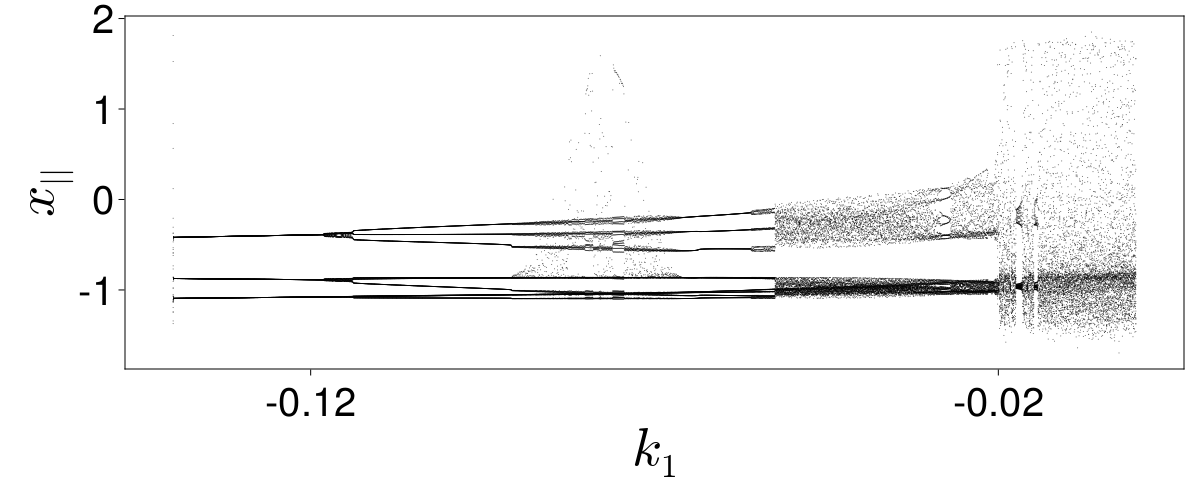

In [51]:
# L2
fig = Figure(resolution = (1200, 500))

ax = Axis(fig[1,1]; xlabel = L"k_{1}", ylabel = L"x_{||}",
xlabelsize = 55, ylabelsize = 55,
xticklabelsize = 40, yticklabelsize = 40  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 0.7), markersize = 1.0
    )
    
end

fig

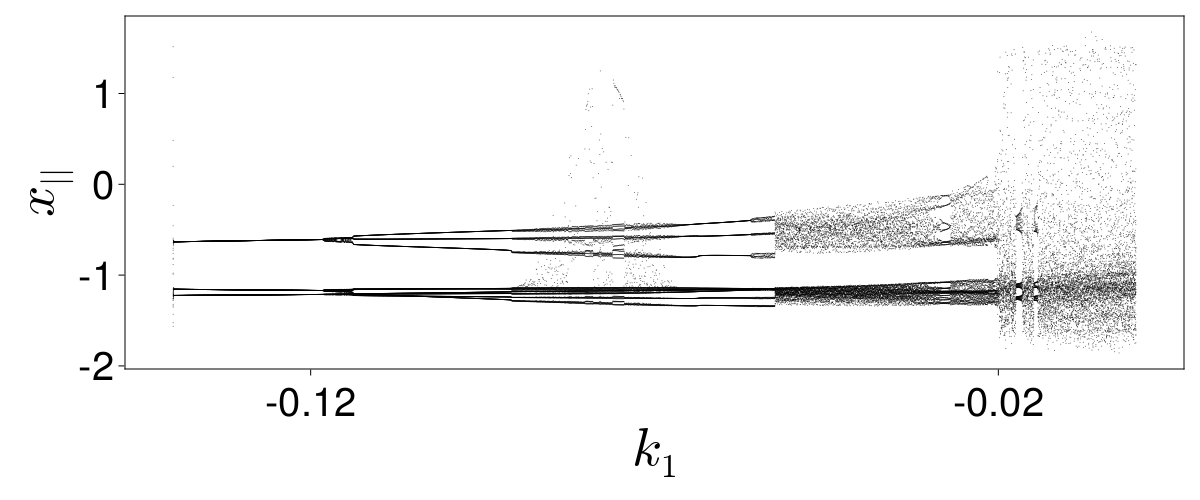

In [53]:
# L2
fig = Figure(resolution = (1200, 500))

ax = Axis(fig[1,1]; xlabel = L"k_{1}", ylabel = L"x_{||}",
xlabelsize = 55, ylabelsize = 55,
xticklabelsize = 40, yticklabelsize = 40  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.7), markersize = 1.0
    )
    
end

fig